### Introduction

I conducted a top-n analysis of the MET's extensive Open Access collections, where I compared the countries of origin that make up the MET’s <b> highlighted</b> collections to the countries of origin that make up the MET’s <b>overall</b> collections.

The second analysis I did was an analysis of top-n colours of the paintings in 8 departments.The MET has 21 departments ranging from "Medieval Art" to "Islamic Art", but given the limited time for this homework, I was only able to scrape the painting images from 8 departments. 

I used Python to carry out both of these analyses.

One of my research interests is in Digital Humanities and GLAM (Galleries, Libraries, Archives, and Museums). As such, I'm using this homework assignment as an opportunity to work with GLAM data and expand my skills in this area. Top-N analysis is useful to identify patterns and trends within the collections. Additionally, I did an image analysis with a tool that I previously had never used before, which was Python Imaging Library (PIL). 

For this assignment, I've chosen to work with the Metropolitan Museum (The MET) Open Access Dataset. This dataset includes over 400,000 pieces of data from the MET's open access collections, which are available for unrestricted use under a Creative Commons 0 (CC0) license. The dataset provides detailed metadata for each artifact in the museum, including information on the countries, medium, time period, object type, images, and more.
 
There is a wealth of information available in this dataset. For example, we can easily determine the frequency of different attributes within the collections, such as the number of daggers from Tibet in their "Arms and Armor" collections. We can also make more implicit inferences, such as identifying common characteristics among artifacts that the museum has marked as "important" or "highlighted"; what does it take for an artifact to be deemed "important" in one of the most prestigious cultural heritage institutions in the world? What does it tell us about their curatorial practice? These kinds of interesting questions came to my mind as I explored the dataset. In my initial stage of exploring the dataset, I also found out the strange way the museum chose to codify the genders associated with the artist of an artwork— only “female” designation is available currently. In other words, the value for the “artist gender” metadata are either blank, or female. It might be the case that they are still working on the database, and that it will be updated in the future. 
 
I selected the MET Open Access Dataset for this project because the MET is one of the largest and most renowned museums in the world. The museum's choices in what to display and how to classify and frame the artifacts carry significant weight in the broader knowledge ecosystem.
While researching for this project, I also considered three other digital humanities/GLAM datasets: the Rijksmuseum dataset ( https://data.rijksmuseum.nl/?_ga=2.164289788.213529329.1597649092-980838714.1596699247), the Princeton Ethiopian, Eritrean, and Egyptian Miracles of Mary (PEMM) Project dataset ( https://zenodo.org/record/6909569), and the dataset from the Shakespeare and Company project ( https://shakespeareandco.princeton.edu/about/). While I did explore these datasets, I ultimately found the MET dataset to be the most engaging and interesting.


### Data Exploration and Research Question

Two main questions that I explored were: 

##### Q1 What are the top ten countries of origin that make up the MET's "highlighted/important" open access collections? Are they different than the top ten countries that make up the overall MET's open access collections?  

Context: One of the metadata available in the MET dataset is called "highlighted/important", which is described as <i> "When "true" indicates a popular and important artwork in the collection"</i> according to the MET API documentation.  

My first research question-- which examined the top ten countries that make up the MET's "highlighted/important" open access collections-- allowed me to gain insight into how cultural heritage institutions prioritize different cultures in their collection practices. This knowledge is essential for anyone interested in GLAM/Digital Humanities, and also why I chose to explore this wuestion, as it helps to better understand the ways in which museums shape public knowledge and the overall knowledge ecosystem through their curatorial practices. By exploring the top ten countries of origin in the overall open access collections, I was able to compare the highlighted collections to the museum's broader collection practices and identify any disparities or patterns. 


##### Q2 What are the average top-8  painting colours from each department at the MET? 

By analyzing the top colors used in various departments, we might be able to gain insights into the broader cultural context and significance of color choices across time and cultures. Colors often carry symbolic, historical, or cultural meanings. This analysis helps uncover how color palettes are employed to convey specific messages or evoke particular cultural associations within the museum's collections. Also, this analysis was useful for my personal aims and goals I previously mentioned in the Introduction-- conducting color analysis provides quantitative data that can be used for cultural analytics, which is something that I want to explore and something I can further do with this dataset.

After conducting analyses, my questions did not change but I decided to do a similar analysis I did with (1) on the painting collections at the MET open access, wherein I compared the top-10 cultures of all the paintings vs. top 10-cultures of the paintings that are <i>"highlighted/important"</i> 

### Representative Visualisations
##### This is the visualisation of Q1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('MetObjectsv2.csv')

#top_ten_overall_cultures = df['Culture'].value_counts().head(10)
#top_ten_highlighted_cultures = df[df['Is Highlight'] == True]['Culture'].value_counts().head(10)

/var/folders/fd/2qjv768x16n47brwylzghthm0000gp/T/ipykernel_15804/3411853396.py:3: DtypeWarning: Columns (6,13,16,17,22,23,25,30,31,39,40,41,42,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MetObjectsv2.csv')


In [5]:
import os
import math
import colorsys
from PIL import Image, ImageDraw
from collections import Counter
import numpy as np

In [2]:
top_ten_overall_countries = df['Country'].value_counts().head(10)
top_ten_highlighted_countries = df[df['Is Highlight'] == True]['Country'].value_counts().head(10)

# Create a horizontal bar graph
plt.barh(top_ten_overall_countries.index, top_ten_overall_countries.values)

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Overall Countries of Origin at the MET open access')

plt.show()

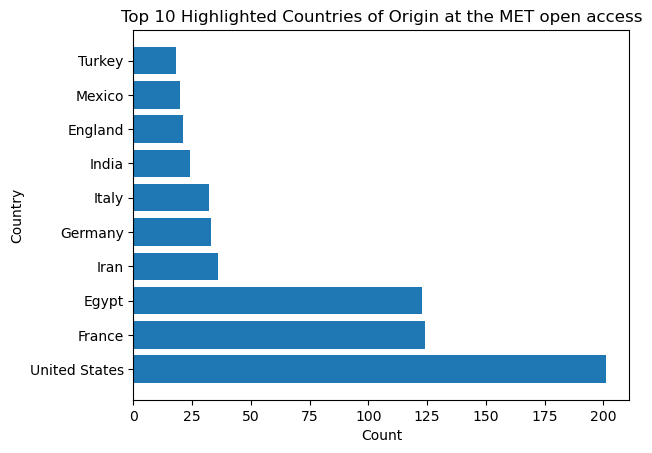

In [4]:
# Create a horizontal bar graph
plt.barh(top_ten_highlighted_countries.index, top_ten_highlighted_countries.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Highlighted Countries of Origin at the MET open access')

# Display the bar graph
plt.show()


1. What does the representative visualisation show, how was it created, and why is it interesting?

The visualisations above are the result of the analysis I did for Q1.The first graph shows the top 10 countries in the overall collection, and the secon graph shows the top 10 countries that make up their "highlighted" collections. 
It was created with Python and associated libraries; matplotlib for the viz, pandas for data structuring. To display the top 10 overall countries, I selected the "Country" column from the dataframe and plotted it on a the horizontal bar, where the X axis is the count and y axis shows the countries. The second graph was created in a similar way. I added a filter [df['Is Highlight'] == True] to return the collections that are highlighted. 

This visualisation is an attempt to answer Q1, and it is interesting
because we can see that there are some countries that make up a signifcant portion of the MET's overall collection, but are not considered important, and vice versa. 
While there is not a lot of important conclusion to be drawn, I think this is a good place to start the examining their curatorial practices. 
More questions can be asked and analysed by adding more filters to the analysis, such as looking at what types of artefact that make up most of the highlighted collections from Egypt.
It would be interesting to know the requiremetns set by the museums for an artifact to be considered as 'importanmt', are we talking about important in the sense that it generates the most foot traffic? important in terms of monetary value of the artefacts? or important in terms of  historic siginificance of the artifacts? 

2. How does the visualisation reflect on one aspect of data wrangling, data management or data analysis?

This reflects the significance of a simple count/top-n analysis, which often is a starting point of a more complex analysis. It is not a complicated method of analysis, but it opens up so many doors of questions and further refinement of the research questions. 

3. How does the visualisation contain reflections showing the relevance of this process to the NBE?

This is relevant to NBE because cultural heritage insitutions such as museums are also a part of data-driven society. 
As more museums digitize their collections and making the collections and metadata public, it invites more people to critically examine these cultural heritage institutions and what happens behind the closed doors.
for example, In the context of cultural collections, feedback loop can be implemented to evaluate the representation of cultures and assess the effectiveness of curatorial choices-- if certain cultures are consistently underrepresented in the highlighted collections, feedback from researchers and experts can prompt adjustments in curatorial decisions to ensure a more balanced representation.






### This is the visualisation of Q2

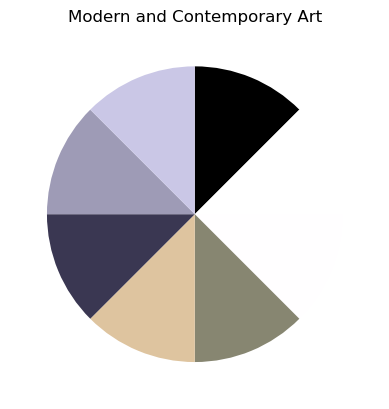

In [6]:
# Define the folder path containing the images
folder_path = 'images/modern_and_contemporary_art'

# Initialize a list to store all the colors from the images
all_colors = []

# Iterate over each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)

        # use the fast octree method for quantization
        colors = img.quantize(colors=8, method=1)

        # get a list of the unique colors in the image
        unique_colors = colors.getpalette()[:24]
        unique_colors = [(unique_colors[i], unique_colors[i+1], unique_colors[i+2]) for i in range(0, len(unique_colors), 3)]

        # add the unique colors to the list of all colors
        all_colors.extend(unique_colors)

# Calculate the frequency of each color
color_counter = Counter(all_colors)

# Sort the colors based on their frequency
sorted_colors = sorted(color_counter, key=color_counter.get, reverse=True)

# Display the top 8 colors
#for i in range(8):
#    color = sorted_colors[i]
#    print(f"Color {i+1}: RGB({color[0]:.0f}, {color[1]:.0f}, {color[2]:.0f

#This is the top 8 colors 
top_8_colors = sorted_colors[:8]

# Convert RGB values to the range [0, 1]
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in top_8_colors]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot a colored pie chart
ax.pie([1] * len(top_8_colors), colors=normalized_colors, startangle=90, counterclock=False)
ax.set_title("Modern and Contemporary Art")
ax.axis('off')

# Show the plot
plt.show()

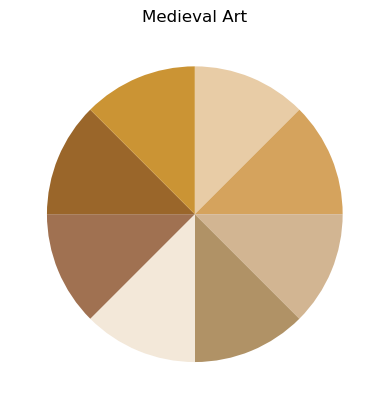

In [9]:
# Define the folder path containing the images
folder_path = 'images/medieval_art'

# Initialize a list to store all the colors from the images
all_colors = []

# Iterate over each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)

        # use the fastoctree method for quantization
        colors = img.quantize(colors=8, method=2)

        # get a list of the unique colors in the image
        unique_colors = colors.getpalette()[:24]
        unique_colors = [(unique_colors[i], unique_colors[i+1], unique_colors[i+2]) for i in range(0, len(unique_colors), 3)]

        # add the unique colors to the list of all colors
        all_colors.extend(unique_colors)

# Calculate the frequency of each color
color_counter = Counter(all_colors)

# Sort the colors based on their frequency
sorted_colors = sorted(color_counter, key=color_counter.get, reverse=True)

# Display the top 8 colors
#for i in range(8):
#    color = sorted_colors[i]
#    print(f"Color {i+1}: RGB({color[0]:.0f}, {color[1]:.0f}, {color[2]:.0f

#This is the top 8 colors 
top_8_colors = sorted_colors[:8]

# Convert RGB values to the range [0, 1] -> this is because matplotlib only takes in normalized rgb vals
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in top_8_colors]

fig, ax = plt.subplots()

# Plot a pie chart
ax.pie([1] * len(top_8_colors), colors=normalized_colors, startangle=90, counterclock=False)
ax.set_title("Medieval Art")
ax.axis('off')

# Show the plot
plt.show()

1. What does the representative visualisation show, how was it created, and why is it interesting? 

The visualizations above depict two color wheels showcasing the most prominent colours in the Modern and Contemporary department as well as the Medieval Art department. These visualizations were created using Python and libraries such as PIL, Math, Colorsys, Numpy, Counter, and OS. Additionally, BeautifulSoup was used to scrape images from the MET's website. First, I created a specific dataframe for all the paintings in the collections. Then, using a BeautifulSoup, I extracted the images of the paintings from different departments on the MET's official website. It's worth noting that all the images used are also certified under Creative Commons 0.Next, I developed a script that iterated through each department's painting folder and identified the eight most common colours in each department. I visualized these colorus using matplotlib's pie charts. This analysis was conducted on nine out of the 21 departments.

The results revealed fascinating insights, particularly in terms of the colour usage differences between Modern and Contemporary art versus Medieval Art. As you can see, the Modern and Contemporary department exhibited a wider, and more vibrant range of color variations, while The Medieval Department paintings predominantly used a more limited and subdued color palette, such as earth tones, muted shades, and restrained color. The result from the Modern and Contemporary art department can be interpreted as the tendency of exploratuon and experimentation with different color combinations to convey freedom artistic expression. On the other hand, the paintings in the Medieval Art department predominantly focused on religious imagery, along with realistic depictions of humans and biblical figures. We could perhaps speculate that the more "strict" colour choices reflect the sense of religious devotion, solemnity and tendency to adhere to the traditional atristic convention of the time. 

2. How does the visualisation reflect on one aspect of data wrangling, data management or data analysis? 

This visualisation reflects one way of doing data analysis on a non-textual cultural artefact, and also it reflects on how you can be creative when doing your data viz -- you can use pie chart in a non-traditional way. I used pie chart because I did not want to do complicated math to make a colour wheel (and because I failed to do so). So, I used matplotlib's pie chart and fill the circle with the top 8 colours instead. 

3. How does the visualisation contain reflections showing the relevance of this process to the NBE? 

This analysis further emphasizes the transformation of various aspects of humans lives into data within our data-driven society, including collections of centuries-old paintings. It highlights the opportunities to integrate technology into fields that traditionally do not rely on computational analysis, benefiting researchers and scholars in their investigations. With the availablity of computational power and resources, we can easily analyse a collection of paintings that otherwise would take forever to complete. Moreover, by examining the color choices in Modern and Contemporary art versus Medieval Art, we can identify patterns, preferences, and influences that reflect the cultural context of each period. I think in creating a new branch of engineering, it is also important that we look at the past. Gaining a deeper understanding of artistic movements, societal values, and cultural shifts of different periods of time can inform us about the things that make humans truly <i> human </i>, and it is often embedded in art and creative expressions. 


### This is the visualisation of my additional question, inspired by Q1

![Viz3](viz3.png)


1. What does the representative visualisation show, how was it created, and why is it interesting? 

This is a comparison of the number of overall paintings in all departments vs the number of highlighted paintings in each department. I created this visualisation with Tableau, because I wanted to try a new tool. I find this to be fascinating. The number of paintings coming from the Asian Art department is over 4000, but only few of asian art paintings are considered "highlighted" or important. This raises the same question I had for Q1; what is the criteria for an artifact to be considered "important"

2. How does the visualisation reflect on one aspect of data wrangling, data management or data analysis? 

For this analysis, I created another dataframe for paintings alone and exported to csv using python. This makes loading the huge data to Tableau to be much faster. This shows that thre are many ways to manage, and work with huge datasets. 

3. How does the visualisation contain reflections showing the relevance of this process to the NBE? 

I think this visualisation is relevant to NBE because it shows that there are many tools that you can conduct your data analysis in, and that you are not just limited to Python, or Excel. Tableau is more accessible; you really do not need to understand how to code to run an analysis in Tableau. This makes data analysis to be accessible, and I think more computational tools should be designed to be more accessible. 

#### CONCLUSION

In this exploratory data analysis, I attempted to answer two main questions, which are <b> Q1 What are the top ten countries of origin that make up the MET's "highlighted/important" open access collections? Are they different than the top ten countries that make up the overall MET's open access collections? </b> and <b>Q2 What are the average top-8  painting colours from each department at the MET? </b> using the the MET's open access dataset. 

From this analysis we can see that certain countries contribute significantly to the overall MET collection but are not considered important, while others hold importance but have a smaller presence. Additionally, notable distinctions were found between the top-8 colors in Modern and Contemporary art compared to Medieval art. Furthermore, it was discovered that the Asian Art department contributes significantly to the overall collection, yet fewer than 20 paintings are regarded as important.


One limitation to consider is the presence of incomplete metadata in the dataset, such as the absence of "Gender" information as previously discussed. This limited the available metadata for analysis. If given the opportunity to redo the analysis, I would aim to download paintings from all departments and explore the possibility of conducting computer vision analysis to identify common subjects or objects across different periods of the painting collections.

Acknowledgements: Matthew for suggesting what to do with empty columns, Gabi for helping me troubleshoot the errors I encountered when scraping the painting images. 

## APPENDIX: Results from Q2

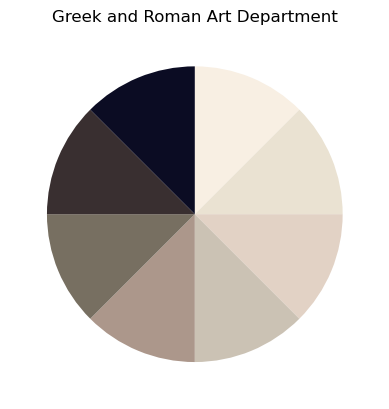

In [10]:
# Define the folder path containing the images
folder_path = 'images/greek_and_roman_art'

# Initialize a list to store all the colors from the images
all_colors = []

# Iterate over each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  # Add other supported image formats if needed
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)

        # reduce the number of colors to a predefined set of common colors
        # use the fast octree method for quantization
        colors = img.quantize(colors=8, method=0)

        # get a list of the unique colors in the image
        unique_colors = colors.getpalette()[:24]
        unique_colors = [(unique_colors[i], unique_colors[i+1], unique_colors[i+2]) for i in range(0, len(unique_colors), 3)]

        # add the unique colors to the list of all colors
        all_colors.extend(unique_colors)

# Calculate the frequency of each color
color_counter = Counter(all_colors)

# Sort the colors based on their frequency
sorted_colors = sorted(color_counter, key=color_counter.get, reverse=True)

# Display the top 8 colors
#for i in range(8):
#    color = sorted_colors[i]
#    print(f"Color {i+1}: RGB({color[0]:.0f}, {color[1]:.0f}, {color[2]:.0f

#This is the top 8 colors 
top_8_colors = sorted_colors[:8]

# Convert RGB values to the range [0, 1]
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in top_8_colors]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the aspect ratio to make the circle appear round
# Plot a colored pie chart
ax.pie([1] * len(top_8_colors), colors=normalized_colors, startangle=90, counterclock=False)
ax.set_title("Greek and Roman Art Department")
ax.axis('off')

# Show the plot
plt.show()

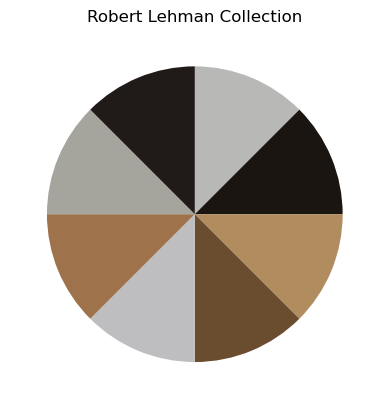

In [11]:
# Define the folder path containing the images
folder_path = 'images/robert_lehman_collection'

# Initialize a list to store all the colors from the images
all_colors = []

# Iterate over each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  # Add other supported image formats if needed
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)

        # reduce the number of colors to a predefined set of common colors
        # use the fast octree method for quantization
        colors = img.quantize(colors=8, method=2)

        # get a list of the unique colors in the image
        unique_colors = colors.getpalette()[:24]
        unique_colors = [(unique_colors[i], unique_colors[i+1], unique_colors[i+2]) for i in range(0, len(unique_colors), 3)]

        # add the unique colors to the list of all colors
        all_colors.extend(unique_colors)

# Calculate the frequency of each color
color_counter = Counter(all_colors)

# Sort the colors based on their frequency
sorted_colors = sorted(color_counter, key=color_counter.get, reverse=True)

# Display the top 8 colors
#for i in range(8):
#    color = sorted_colors[i]
#    print(f"Color {i+1}: RGB({color[0]:.0f}, {color[1]:.0f}, {color[2]:.0f

#This is the top 8 colors 
top_8_colors = sorted_colors[:8]

# Convert RGB values to the range [0, 1]
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in top_8_colors]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the aspect ratio to make the circle appear round
# Plot a colored pie chart
ax.pie([1] * len(top_8_colors), colors=normalized_colors, startangle=90, counterclock=False)
ax.set_title("Robert Lehman Collection")
ax.axis('off')

# Show the plot
plt.show()

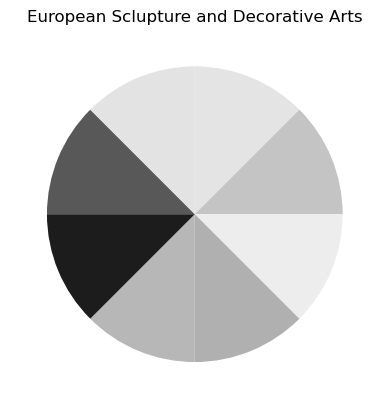

In [12]:
# Define the folder path containing the images
folder_path = 'images/european_sclupture_and_decorative_arts'

# Initialize a list to store all the colors from the images
all_colors = []

# Iterate over each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  # Add other supported image formats if needed
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)

        # reduce the number of colors to a predefined set of common colors
        # use the fast octree method for quantization
        colors = img.quantize(colors=8, method=0)

        # get a list of the unique colors in the image
        unique_colors = colors.getpalette()[:24]
        unique_colors = [(unique_colors[i], unique_colors[i+1], unique_colors[i+2]) for i in range(0, len(unique_colors), 3)]

        # add the unique colors to the list of all colors
        all_colors.extend(unique_colors)

# Calculate the frequency of each color
color_counter = Counter(all_colors)

# Sort the colors based on their frequency
sorted_colors = sorted(color_counter, key=color_counter.get, reverse=True)

# Display the top 8 colors
#for i in range(8):
#    color = sorted_colors[i]
#    print(f"Color {i+1}: RGB({color[0]:.0f}, {color[1]:.0f}, {color[2]:.0f

#This is the top 8 colors 
top_8_colors = sorted_colors[:8]

# Convert RGB values to the range [0, 1]
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in top_8_colors]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the aspect ratio to make the circle appear round
# Plot a colored pie chart
ax.pie([1] * len(top_8_colors), colors=normalized_colors, startangle=90, counterclock=False)
ax.set_title("European Sclupture and Decorative Arts")
ax.axis('off')

# Show the plot
plt.show()

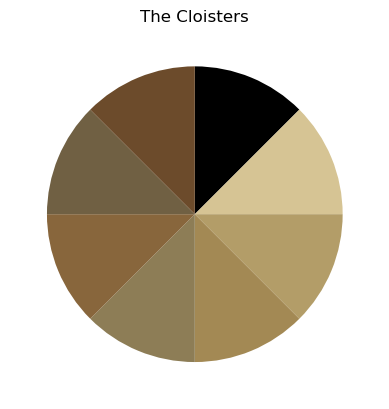

In [13]:
# Define the folder path containing the images
folder_path = 'images/the_cloisters'

# Initialize a list to store all the colors from the images
all_colors = []

# Iterate over each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  # Add other supported image formats if needed
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)

        # reduce the number of colors to a predefined set of common colors
        # use the fast octree method for quantization
        colors = img.quantize(colors=8, method=0)

        # get a list of the unique colors in the image
        unique_colors = colors.getpalette()[:24]
        unique_colors = [(unique_colors[i], unique_colors[i+1], unique_colors[i+2]) for i in range(0, len(unique_colors), 3)]

        # add the unique colors to the list of all colors
        all_colors.extend(unique_colors)

# Calculate the frequency of each color
color_counter = Counter(all_colors)

# Sort the colors based on their frequency
sorted_colors = sorted(color_counter, key=color_counter.get, reverse=True)

# Display the top 8 colors
#for i in range(8):
#    color = sorted_colors[i]
#    print(f"Color {i+1}: RGB({color[0]:.0f}, {color[1]:.0f}, {color[2]:.0f

#This is the top 8 colors 
top_8_colors = sorted_colors[:8]

# Convert RGB values to the range [0, 1]
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in top_8_colors]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the aspect ratio to make the circle appear round
# Plot a colored pie chart
ax.pie([1] * len(top_8_colors), colors=normalized_colors, startangle=90, counterclock=False)
ax.set_title("The Cloisters")
ax.axis('off')

# Show the plot
plt.show()

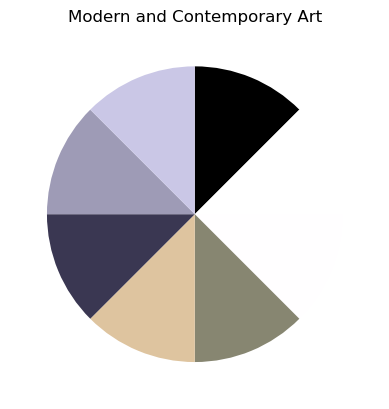

In [14]:
# Define the folder path containing the images
folder_path = 'images/modern_and_contemporary_art'

# Initialize a list to store all the colors from the images
all_colors = []

# Iterate over each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)

        # reduce the number of colors to a predefined set of common colors
        # use the fast octree method for quantization
        colors = img.quantize(colors=8, method=1)

        # get a list of the unique colors in the image
        unique_colors = colors.getpalette()[:24]
        unique_colors = [(unique_colors[i], unique_colors[i+1], unique_colors[i+2]) for i in range(0, len(unique_colors), 3)]

        # add the unique colors to the list of all colors
        all_colors.extend(unique_colors)

# Calculate the frequency of each color
color_counter = Counter(all_colors)

# Sort the colors based on their frequency
sorted_colors = sorted(color_counter, key=color_counter.get, reverse=True)

# Display the top 8 colors
#for i in range(8):
#    color = sorted_colors[i]
#    print(f"Color {i+1}: RGB({color[0]:.0f}, {color[1]:.0f}, {color[2]:.0f

#This is the top 8 colors 
top_8_colors = sorted_colors[:8]

# Convert RGB values to the range [0, 1]
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in top_8_colors]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the aspect ratio to make the circle appear round
# Plot a colored pie chart
ax.pie([1] * len(top_8_colors), colors=normalized_colors, startangle=90, counterclock=False)
ax.set_title("Modern and Contemporary Art")
ax.axis('off')

# Show the plot
plt.show()

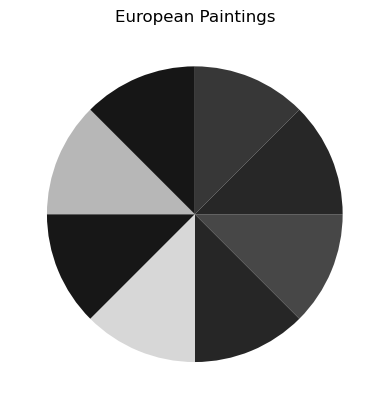

In [16]:
# Define the folder path containing the images
folder_path = 'images/european_paintings'

# Initialize a list to store all the colors from the images
all_colors = []

# Iterate over each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)

        # reduce the number of colors to a predefined set of common colors
        # use the fast octree method for quantization
        colors = img.quantize(colors=8, method=2)

        # get a list of the unique colors in the image
        unique_colors = colors.getpalette()[:24]
        unique_colors = [(unique_colors[i], unique_colors[i+1], unique_colors[i+2]) for i in range(0, len(unique_colors), 3)]

        # add the unique colors to the list of all colors
        all_colors.extend(unique_colors)

# Calculate the frequency of each color
color_counter = Counter(all_colors)

# Sort the colors based on their frequency
sorted_colors = sorted(color_counter, key=color_counter.get, reverse=True)

# Display the top 8 colors
#for i in range(8):
#    color = sorted_colors[i]
#    print(f"Color {i+1}: RGB({color[0]:.0f}, {color[1]:.0f}, {color[2]:.0f

#This is the top 8 colors 
top_8_colors = sorted_colors[:8]

# Convert RGB values to the range [0, 1]
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in top_8_colors]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the aspect ratio to make the circle appear round
# Plot a colored pie chart
ax.pie([1] * len(top_8_colors), colors=normalized_colors, startangle=90, counterclock=False)
ax.set_title("European Paintings")
ax.axis('off')

# Show the plot
plt.show()

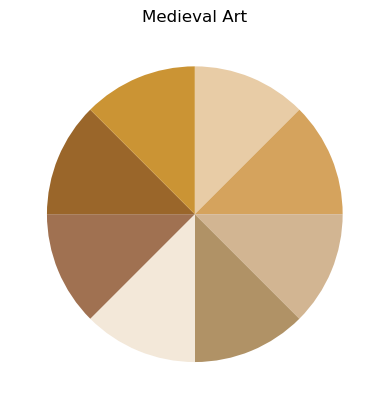

In [17]:
# Define the folder path containing the images
folder_path = 'images/medieval_art'

# Initialize a list to store all the colors from the images
all_colors = []

# Iterate over each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)

        # reduce the number of colors to a predefined set of common colors
        # use the fast octree method for quantization
        colors = img.quantize(colors=8, method=2)

        # get a list of the unique colors in the image
        unique_colors = colors.getpalette()[:24]
        unique_colors = [(unique_colors[i], unique_colors[i+1], unique_colors[i+2]) for i in range(0, len(unique_colors), 3)]

        # add the unique colors to the list of all colors
        all_colors.extend(unique_colors)

# Calculate the frequency of each color
color_counter = Counter(all_colors)

# Sort the colors based on their frequency
sorted_colors = sorted(color_counter, key=color_counter.get, reverse=True)

# Display the top 8 colors
#for i in range(8):
#    color = sorted_colors[i]
#    print(f"Color {i+1}: RGB({color[0]:.0f}, {color[1]:.0f}, {color[2]:.0f

#This is the top 8 colors 
top_8_colors = sorted_colors[:8]

# Convert RGB values to the range [0, 1]
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in top_8_colors]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the aspect ratio to make the circle appear round
# Plot a colored pie chart
ax.pie([1] * len(top_8_colors), colors=normalized_colors, startangle=90, counterclock=False)
ax.set_title("Medieval Art")
ax.axis('off')

# Show the plot
plt.show()

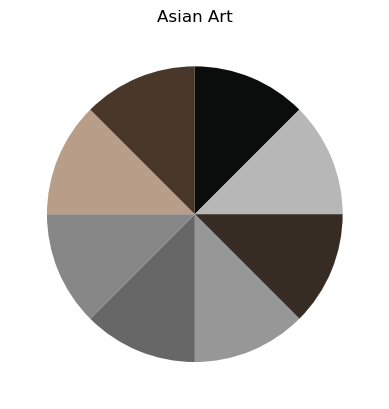

In [18]:
# Define the folder path containing the images
folder_path = 'images/asian_art'

# Initialize a list to store all the colors from the images
all_colors = []

# Iterate over each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)

        # reduce the number of colors to a predefined set of common colors
        # use the fast octree method for quantization
        colors = img.quantize(colors=8, method=2)

        # get a list of the unique colors in the image
        unique_colors = colors.getpalette()[:24]
        unique_colors = [(unique_colors[i], unique_colors[i+1], unique_colors[i+2]) for i in range(0, len(unique_colors), 3)]

        # add the unique colors to the list of all colors
        all_colors.extend(unique_colors)

# Calculate the frequency of each color
color_counter = Counter(all_colors)

# Sort the colors based on their frequency
sorted_colors = sorted(color_counter, key=color_counter.get, reverse=True)

# Display the top 8 colors
#for i in range(8):
#    color = sorted_colors[i]
#    print(f"Color {i+1}: RGB({color[0]:.0f}, {color[1]:.0f}, {color[2]:.0f

#This is the top 8 colors 
top_8_colors = sorted_colors[:8]

# Convert RGB values to the range [0, 1]
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in top_8_colors]

# Create a figure and axis
fig, ax = plt.subplots()

# Set the aspect ratio to make the circle appear round
# Plot a colored pie chart
ax.pie([1] * len(top_8_colors), colors=normalized_colors, startangle=90, counterclock=False)
ax.set_title("Asian Art")
ax.axis('off')

# Show the plot
plt.show()